In [20]:
# Задача: требуется предсказать возраст ракушки (число колец) по физическим измерениям, используя Random Forest. 
# Abalone - морское ушко (моллюск).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [23]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
# Преобразуем признак 'Sex' в числовой
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0, 0.5, 'Rings')

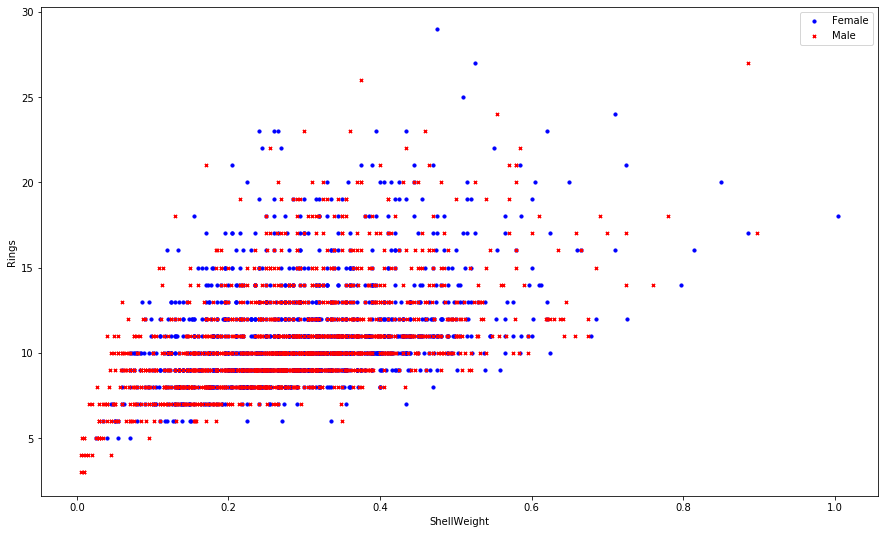

In [25]:
# Визуализируем данные

male = df.query('Sex == 1')
female = df.query('Sex == -1')

fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(female['ShellWeight'], female['Rings'], s=10, color='blue', marker='o', label='Female')
ax.scatter(male['ShellWeight'], male['Rings'], s=10, color='red', marker='x', label='Male')
ax.legend()
ax.set_xlabel('ShellWeight')
ax.set_ylabel('Rings')

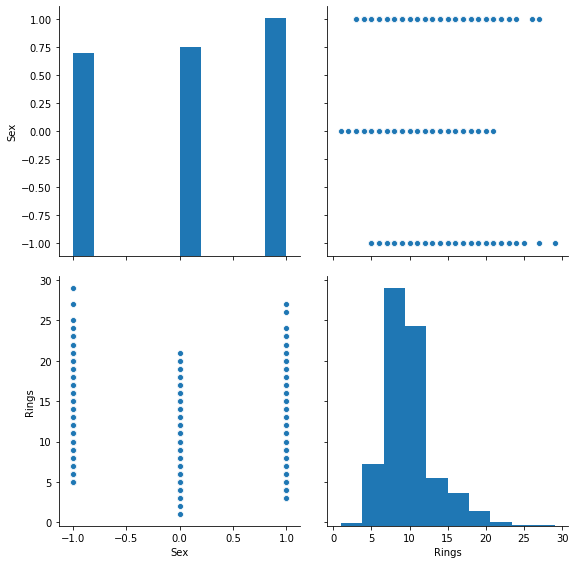

In [31]:
ax = sns.pairplot(df, height = 4, vars = ['Sex', 'Rings'])    # height отвечает за масштаб графика

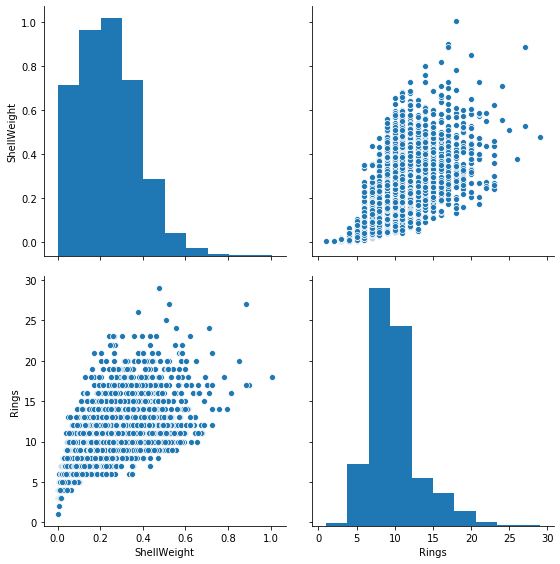

In [50]:
ax = sns.pairplot(df, height = 4, vars = ['ShellWeight', 'Rings'])    # height отвечает за масштаб графика

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [58]:
X = df.drop(['Rings'], axis=1)
y = df.Rings

In [59]:
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Тестовое множество составит 33%, оставшиеся 67% - тренировочное множество

In [70]:
reg = RandomForestRegressor(n_jobs=-1)
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [71]:
parameters = {'max_depth': range(1, 11),
              'n_estimators': range(1, 25)
             }

In [72]:
grid_search_cv_reg = GridSearchCV(reg, parameters, cv=5)

In [73]:
grid_search_cv_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 11),
      

In [74]:
grid_search_cv_reg.best_params_

{'max_depth': 8, 'n_estimators': 20}

In [76]:
best_reg = grid_search_cv_reg.best_estimator_
best_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [77]:
best_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [78]:
print(best_reg.score(X_train, y_train))    # Точность на тренировочных данных
print(best_reg.score(X_test, y_test))    # Точность на тестовых данных

y_pred = best_reg.predict(X_test)

0.7509713015592417
0.5432203457667489


In [86]:
y_pred_round = np.around(y_pred)    # Предсказанные значения возраста моллюсков, округленные до целого

Text(0, 0.5, 'Rings')

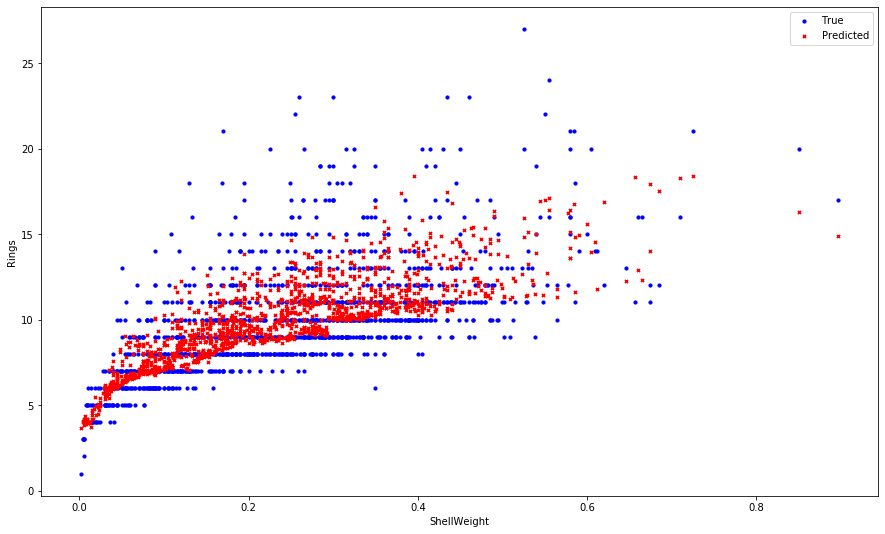

In [88]:
# Визуализируем истинные и предсказанные значения возраста моллюсков

fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(X_test['ShellWeight'], y_test, s=10, color='blue', marker='o', label='True')
ax.scatter(X_test['ShellWeight'], y_pred, s=10, color='red', marker='x', label='Predicted')
ax.legend()
ax.set_xlabel('ShellWeight')
ax.set_ylabel('Rings')